# **4.	Problem Statement**

Write a Python program to draw a 3D plot that visualizes the regression model for house price prediction using suitable Python-based 3D plotting libraries.

Assume the following features were used:
- Area (sq ft)
- Number of Bedrooms
- House Price


Data used: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'housing-prices-dataset' dataset.
Path to dataset files: /kaggle/input/housing-prices-dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
data = path + "/Housing.csv"
df = pd.read_csv(data, usecols=['price', 'area', 'bedrooms'])
df

,price,area,bedrooms
0,13300000,7420,4
1,12250000,8960,4
2,12250000,9960,3
3,12215000,7500,4
4,11410000,7420,4
...,...,...,...
540,1820000,3000,2
541,1767150,2400,3
542,1750000,3620,2
543,1750000,2910,3


In [ ]:
# check if any null value in the DataFrame
df.isnull().sum()

,0
price,0
area,0
bedrooms,0


In [ ]:
X = df[['area', 'bedrooms']]
y = df['price']

## If we need data scale, run below:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.04672629,  1.40341936],
       [ 1.75700953,  1.40341936],
       [ 2.21823241,  0.04727831],
       ...,
       [-0.70592066, -1.30886273],
       [-1.03338891,  0.04727831],
       [-0.5998394 ,  0.04727831]])

## If no need scale, use below

In [ ]:
# X_scaled = X
# X_scaled

In [ ]:
print("Features (X) head:\n", X.head())
print("\nTarget (y) head:\n", y.head())

Features (X) head:
    area  bedrooms
0  7420         4
1  8960         4
2  9960         3
3  7500         4
4  7420         4

Target (y) head:
 0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([5721232.88463307, 5259089.65566028, 3605915.69248562,
       4675251.06046329, 4270456.3011267 , 5344719.31628917,
       6045325.63052557, 5367037.47021356, 3294535.10838056,
       3780031.88116123, 6764357.84138504, 3564657.7650917 ,
       3481363.45884359, 3935722.17321376, 4274348.55842802,
       4142011.81018336, 2811895.20301771, 5064476.79059462,
       5006092.93107492, 4368798.12354303, 4683035.57506591,
       5385588.01795296, 3453728.43200427, 4208180.18430569,
       5940234.68339011, 6605810.68191468, 3236151.24886086,
       3896799.60020063, 7866902.04754019, 3201120.93314904,
       4286025.33033196, 3943506.68781639, 5064476.79059462,
       5303850.61462538, 5283353.93823533, 4519560.76841075,
       4537465.1519968 , 4662538.89867585, 4083627.95066366,
       4509573.18673424, 5835143.73625465, 3446333.14313177,
       5227951.59724977, 4363870.47635822, 4660717.42114152,
       4324037.16457792, 5064476.79059462, 5230808.4646676 ,
       5166710.87031225,

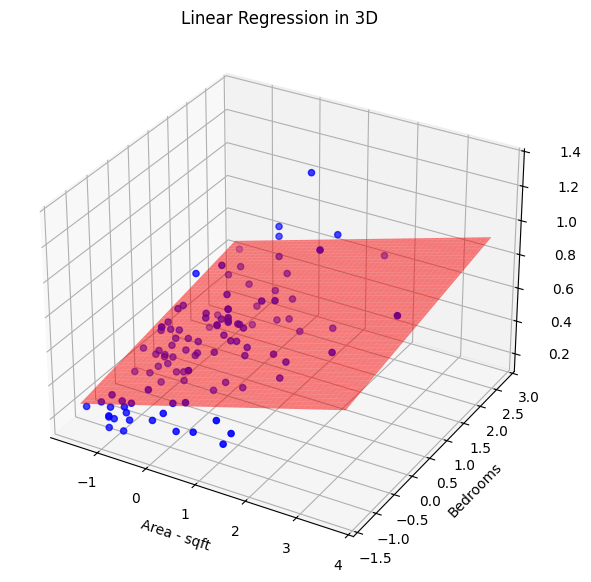

In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# use below if *NO* scale is required
# ---
# ax.scatter(X_test[:, 0], X_test[:, 1],
#            y_test, color='blue', label='Actual Data')

# x1_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
# x2_range = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
# ---


# use below if scale is required
# ---
ax.scatter(X_test[:, 0], X_test[:, 1],
           y_test, color='blue', label='Actual Data')

x1_range = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
x2_range = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)
# ---


z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)


z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

ax.plot_surface(x1, x2, z, color='red', alpha=0.5, label='Predicted Data')

ax.set_xlabel('Area - sqft')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('House Price', labelpad=15)
ax.tick_params(axis='z', pad=12)
ax.set_title('Linear Regression in 3D')

plt.show()